<a href="https://colab.research.google.com/github/mhmtnzly/Autoscout24/blob/main/project_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import re
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts
import itertools
%matplotlib inline
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/autoscout_data_2000.csv')
df = data.copy()

In [3]:
df['seller'].value_counts()
df['seller'] = df['seller'].str.extract('([A-Za-z]+\s*[a-z]+)')
df['seller'].unique()

array(['Dealer', 'Private seller', 'Diesel', 'Electric', 'Gasoline'],
      dtype=object)

In [4]:
df.drop((df[(df['seller']=='Diesel')|(df['seller']=='Electric')|(df['seller']=='Gasoline')].index).values, axis=0, inplace = True)

In [5]:
df.reset_index(drop=True,inplace=True)

In [6]:
df.columns

Index(['location', 'url', 'make', 'model', 'short_description', 'price',
       'mileage', 'gearbox', 'registration', 'fuel_type', 'power', 'seller',
       'body_type', 'type', 'drivetrain', 'seats', 'doors', 'country_version',
       'offer_number', 'warranty', 'Mileage', 'first_registration',
       'production_date', 'general_inspection', 'last_service',
       'full_service_history', 'non_smoker_vehicle', 'previous_owner',
       'last_timing_belt_change', 'Power', 'Gearbox', 'engine_size', 'gears',
       'cylinders', 'empty_weight', 'Fuel_type', 'fuel_consumption',
       'co2_emissions', 'emission_class', 'emissions_sticker',
       '\nComfort & Convenience\n', '\nEntertainment & Media\n',
       '\nSafety & Security\n', 'extras', '\ncolour', '\nmanufacturer_color',
       '\npaint', ' upholstery_colour ', ' upholstery '],
      dtype='object')

In [7]:
df.duplicated().sum()

0

In [8]:
my_df = df.copy()
my_df.rename(columns = {'\nComfort & Convenience\n':'Comfort_Convenience','location':'Location','fuel_type':'Fuel_Type','seller':'Seller','gears':'Gears','cylinders':'Cylinders',
                        'empty_weight':'Empty_weight', '\nSafety & Security\n': 'Safety_Security', '\ncolour': 'Colour', '\npaint': 'Paint'," upholstery_colour ": 'Upholstery_colour'," upholstery ": 'Upholstery', '\nEntertainment & Media\n':'Entertainment_Media'},inplace = True)
my_df.head()

,Location,url,make,model,short_description,price,mileage,gearbox,registration,Fuel_Type,...,emissions_sticker,Comfort_Convenience,Entertainment_Media,Safety_Security,extras,Colour,\nmanufacturer_color,Paint,Upholstery_colour,Upholstery
0,"LOON OP ZAND, NL",https://www.autoscout24.com/offers/audi-a3-2-0...,"\n,Audi ,\n","\n,A3,\n",2.0 FSI Ambition Pro Line,"[['\n', '€ 4,450.-', '\n']]","['', ['191,066 km']]","\n,Automatic,\n",08/2003,"\n,Gasoline,\n",...,"\n,None,\n","[['Air conditioning', 'Armrest', 'Automatic cl...","[['CD player', 'Radio']]","[['ABS', 'Alarm system', 'Central door lock', ...",[['Alloy wheels']],"\n4, Grey",None,"\npaint, Metallic","\nupholstery, Black","\n8, Cloth"
1,"HEERLEN, NL",https://www.autoscout24.com/offers/audi-a3-spo...,"\n,Audi ,\n","\n,A3,\n",Sportback 1.4 TFSI Ambiente/ECC/PDC//Lichtmeta...,"[['\n', '€ 12,950.-', '\n']]","['', ['94,758 km']]","\n,Automatic,\n",10/2013,"\n,Gasoline,\n",...,"\n,None,\n","[['Air conditioning', 'Automatic climate contr...","[['CD player', 'Radio']]","[['Alarm system', 'Central door lock', 'Centra...","[['Alloy wheels (16"")']]","\n4, White",None,None,"\nupholstery, Black","\n8, Cloth"
2,"BREDA, NL",https://www.autoscout24.com/offers/audi-a3-1-4...,"\n,Audi ,\n","\n,A3,\n",1.4 TFSI Attraction Pro Line [ Navi Airco Crui...,"[['\n', '€ 12,445.-', '\n']]","['', ['160,883 km']]","\n,Automatic,\n",05/2013,"\n,Gasoline,\n",...,"\n,None,\n","[['Air conditioning', 'Armrest', 'Cruise contr...","[['Bluetooth', 'CD player', 'Hands-free equipm...","[['ABS', 'Central door lock', 'Central door lo...","[['Alloy wheels', 'Spoiler']]","\n4, Black",None,"\npaint, Metallic",None,None
3,"BAARLE-NASSAU, NL",https://www.autoscout24.com/offers/audi-a1-1-4...,"\n,Audi ,\n","\n,A1,\n",1.4 TFSI Sportback Pro-Line Aut. S-Tronic Navi.,"[['\n', '€ 12,450.-', '\n']]","['', ['145,102 km']]","\n,Automatic,\n",06/2015,"\n,Gasoline,\n",...,"\n,None,\n","[['Air conditioning', 'Armrest', 'Automatic cl...","[['Bluetooth', 'CD player', 'On-board computer...","[['ABS', 'Central door lock with remote contro...","[['Alloy wheels (15"")']]","\n4, Grey",None,"\npaint, Metallic",None,None
4,"ZUTPHEN, NL",https://www.autoscout24.com/offers/audi-a1-s-l...,"\n,Audi ,\n","\n,A1,\n",S-Line | Automaat | Navigatie | Cruise-/Climat...,"[['\n', '€ 14,945.-', '\n']]","['', ['119,666 km']]","\n,Automatic,\n",10/2015,"\n,Gasoline,\n",...,"\n,None,\n","[['Air conditioning', 'Armrest', 'Automatic cl...","[['CD player', 'MP3', 'On-board computer', 'Ra...","[['ABS', 'Alarm system', 'Bi-Xenon headlights'...","[['Alloy wheels (17"")', 'Shift paddles', 'Spor...","\n4, Black",None,None,"\nupholstery, Black","\n8, Part leather"


* Comfort_Convenience: Features of car.
* model: Car's Model
* price: Car's price (€)

# None Data

In [9]:
def strNone(data):
  for column in data:
    my_df[column][my_df[column].str.contains('None', na = False)] = None
strNone(my_df)
my_df.head()

,Location,url,make,model,short_description,price,mileage,gearbox,registration,Fuel_Type,...,emissions_sticker,Comfort_Convenience,Entertainment_Media,Safety_Security,extras,Colour,\nmanufacturer_color,Paint,Upholstery_colour,Upholstery
0,"LOON OP ZAND, NL",https://www.autoscout24.com/offers/audi-a3-2-0...,"\n,Audi ,\n","\n,A3,\n",2.0 FSI Ambition Pro Line,"[['\n', '€ 4,450.-', '\n']]","['', ['191,066 km']]","\n,Automatic,\n",08/2003,"\n,Gasoline,\n",...,None,"[['Air conditioning', 'Armrest', 'Automatic cl...","[['CD player', 'Radio']]","[['ABS', 'Alarm system', 'Central door lock', ...",[['Alloy wheels']],"\n4, Grey",None,"\npaint, Metallic","\nupholstery, Black","\n8, Cloth"
1,"HEERLEN, NL",https://www.autoscout24.com/offers/audi-a3-spo...,"\n,Audi ,\n","\n,A3,\n",Sportback 1.4 TFSI Ambiente/ECC/PDC//Lichtmeta...,"[['\n', '€ 12,950.-', '\n']]","['', ['94,758 km']]","\n,Automatic,\n",10/2013,"\n,Gasoline,\n",...,None,"[['Air conditioning', 'Automatic climate contr...","[['CD player', 'Radio']]","[['Alarm system', 'Central door lock', 'Centra...","[['Alloy wheels (16"")']]","\n4, White",None,None,"\nupholstery, Black","\n8, Cloth"
2,"BREDA, NL",https://www.autoscout24.com/offers/audi-a3-1-4...,"\n,Audi ,\n","\n,A3,\n",1.4 TFSI Attraction Pro Line [ Navi Airco Crui...,"[['\n', '€ 12,445.-', '\n']]","['', ['160,883 km']]","\n,Automatic,\n",05/2013,"\n,Gasoline,\n",...,None,"[['Air conditioning', 'Armrest', 'Cruise contr...","[['Bluetooth', 'CD player', 'Hands-free equipm...","[['ABS', 'Central door lock', 'Central door lo...","[['Alloy wheels', 'Spoiler']]","\n4, Black",None,"\npaint, Metallic",None,None
3,"BAARLE-NASSAU, NL",https://www.autoscout24.com/offers/audi-a1-1-4...,"\n,Audi ,\n","\n,A1,\n",1.4 TFSI Sportback Pro-Line Aut. S-Tronic Navi.,"[['\n', '€ 12,450.-', '\n']]","['', ['145,102 km']]","\n,Automatic,\n",06/2015,"\n,Gasoline,\n",...,None,"[['Air conditioning', 'Armrest', 'Automatic cl...","[['Bluetooth', 'CD player', 'On-board computer...","[['ABS', 'Central door lock with remote contro...","[['Alloy wheels (15"")']]","\n4, Grey",None,"\npaint, Metallic",None,None
4,"ZUTPHEN, NL",https://www.autoscout24.com/offers/audi-a1-s-l...,"\n,Audi ,\n","\n,A1,\n",S-Line | Automaat | Navigatie | Cruise-/Climat...,"[['\n', '€ 14,945.-', '\n']]","['', ['119,666 km']]","\n,Automatic,\n",10/2015,"\n,Gasoline,\n",...,None,"[['Air conditioning', 'Armrest', 'Automatic cl...","[['CD player', 'MP3', 'On-board computer', 'Ra...","[['ABS', 'Alarm system', 'Bi-Xenon headlights'...","[['Alloy wheels (17"")', 'Shift paddles', 'Spor...","\n4, Black",None,None,"\nupholstery, Black","\n8, Part leather"


# Null Data Percentages and Dropping

In [10]:
def null_values(df):
    """a function to show null values with percentage"""
    nv=pd.concat([df.isnull().sum(), 100 * df.isnull().sum()/df.shape[0]],axis=1).rename(columns={0:'Missing_Records', 1:'Percentage (%)'})
    return nv[['Percentage (%)']].sort_values('Percentage (%)', ascending=False)
null_values(my_df)

,Percentage (%)
last_service,100.000000
\nmanufacturer_color,100.000000
emissions_sticker,99.783385
last_timing_belt_change,98.663741
previous_owner,93.073958
non_smoker_vehicle,92.011984
production_date,89.572960
country_version,87.313979
warranty,66.233437
Upholstery_colour,34.872141


* production_date, country_version was removed because almost 90 percent of the column is missing value.

In [11]:
my_df.drop(columns = ['url','Gearbox','previous_owner','production_date','country_version','\nmanufacturer_color',"Fuel_type","Paint","Upholstery_colour","Location",'last_service','emissions_sticker','last_timing_belt_change'], inplace = True)

# Variables

# Comfort_Convenience

In [12]:
my_df['Comfort_Convenience'] = my_df['Comfort_Convenience'].str.replace('contro\'\]','control')
my_df['Comfort_Convenience'] = my_df['Comfort_Convenience'].str.replace('whee\'\]','wheel')
my_df['Comfort_Convenience'] = my_df['Comfort_Convenience'].str.findall(r"\'(.+?)\'")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [13]:
values = []
for liste in my_df['Comfort_Convenience']:
  for value in liste:
    values.append(value)
values = set(values)
def boolean_df(item_lists, unique_items):
# Create empty dict
    bool_dict = {}
    # Loop through all the tags
    for i, item in enumerate(unique_items):
        # Apply boolean mask
        bool_dict[item] = item_lists.apply(lambda x: 1 if item in x else 0)
    # Return the results as a dataframe
    return pd.DataFrame(bool_dict)
Comfort_Convenience = boolean_df(my_df['Comfort_Convenience'], values)
my_df = pd.concat([my_df,Comfort_Convenience],axis=1)
my_df.drop(columns = ['Comfort_Convenience'],inplace = True)
my_df.head()

,make,model,short_description,price,mileage,gearbox,registration,Fuel_Type,power,Seller,...,Lumbar support,Automatic climate control,Light sensor,Park Distance Control,Cruise control,Power windows,Armrest,Electric backseat adjustment,"Automatic climate control, 3 zones",Multi-function steering wheel
0,"\n,Audi ,\n","\n,A3,\n",2.0 FSI Ambition Pro Line,"[['\n', '€ 4,450.-', '\n']]","['', ['191,066 km']]","\n,Automatic,\n",08/2003,"\n,Gasoline,\n","110 kW (150 hp),",Dealer,...,0,1,0,0,0,1,1,0,0,0
1,"\n,Audi ,\n","\n,A3,\n",Sportback 1.4 TFSI Ambiente/ECC/PDC//Lichtmeta...,"[['\n', '€ 12,950.-', '\n']]","['', ['94,758 km']]","\n,Automatic,\n",10/2013,"\n,Gasoline,\n","92 kW (125 hp),",Dealer,...,0,1,1,0,0,1,0,0,0,0
2,"\n,Audi ,\n","\n,A3,\n",1.4 TFSI Attraction Pro Line [ Navi Airco Crui...,"[['\n', '€ 12,445.-', '\n']]","['', ['160,883 km']]","\n,Automatic,\n",05/2013,"\n,Gasoline,\n","90 kW (122 hp),",Dealer,...,0,0,0,0,1,1,1,0,0,1
3,"\n,Audi ,\n","\n,A1,\n",1.4 TFSI Sportback Pro-Line Aut. S-Tronic Navi.,"[['\n', '€ 12,450.-', '\n']]","['', ['145,102 km']]","\n,Automatic,\n",06/2015,"\n,Gasoline,\n","92 kW (125 hp),",Dealer,...,0,1,0,0,1,1,1,0,0,0
4,"\n,Audi ,\n","\n,A1,\n",S-Line | Automaat | Navigatie | Cruise-/Climat...,"[['\n', '€ 14,945.-', '\n']]","['', ['119,666 km']]","\n,Automatic,\n",10/2015,"\n,Gasoline,\n","92 kW (125 hp),",Dealer,...,1,1,0,0,1,1,1,0,0,1


In [14]:
def removing_column(df,threshold=0.005):
  print(df.columns[(df.sum()/df.shape[0])<threshold])
  return df.columns[(df.sum()/df.shape[0])<threshold]
my_df.drop(columns = removing_column(Comfort_Convenience), inplace = True)

Index(['Automatic climate control, 4 zones', 'Leather seats', 'Massage seats',
       'Park Distance Control'],
      dtype='object')


# Make - Model

In [15]:
my_df['make'].head()

0    \n,Audi ,\n
1    \n,Audi ,\n
2    \n,Audi ,\n
3    \n,Audi ,\n
4    \n,Audi ,\n
Name: make, dtype: object

In [16]:
my_df['make'].unique()

array(['\n,Audi ,\n', '\n,BMW ,\n', '\n,Ford ,\n', '\n,Mercedes-Benz ,\n',
       '\n,Opel ,\n', '\n,Volkswagen ,\n', '\n,Renault ,\n',
       '\n,Citroen ,\n', '\n,Chevrolet ,\n', '\n,Dacia ,\n',
       '\n,Fiat ,\n', '\n,Honda ,\n', '\n,Hyundai ,\n', '\n,Kia ,\n',
       '\n,Mazda ,\n', '\n,Peugeot ,\n', '\n,Skoda ,\n', '\n,Toyota ,\n',
       '\n,Tesla ,\n', '\n,Volvo ,\n'], dtype=object)

In [17]:
my_df['make'] = my_df['make'].str.extract(r"\,(.+?)\s")

In [18]:
my_df['model'] = my_df['model'].str.extract(r"\,(.+?)\,")

In [19]:
my_df['make-model'] = my_df['make']+'-'+my_df['model']

In [20]:
my_df.drop(columns = ['make','model'],inplace = True)
my_df.shape

(71094, 74)

In [21]:
names = my_df['make-model'].value_counts()[my_df['make-model'].value_counts()<30].index.values
for name in names:
  my_df.drop(my_df[my_df['make-model']==name].index.values, axis = 0, inplace = True)
my_df.reset_index(drop = True, inplace = True)

In [22]:
my_df.shape

(67615, 74)

# Price

In [23]:
my_df['price'] = my_df['price'].str.extract(r"\€(.+?)\.")
my_df['price'] = my_df['price'].str.replace(',','')

In [24]:
my_df['price'] = my_df['price'].apply(pd.to_numeric, errors='ignore')

In [25]:
my_df['price'].head()

0     4450.0
1    12950.0
2    12445.0
3    12450.0
4    14945.0
Name: price, dtype: float64

# Emission_class

In [26]:
my_df['emission_class'].unique()

array(['\n,Euro 4,\n', None, '\n,Euro 6,\n', '\n,Euro 5,\n',
       "['\\n', [' ', ' ', ' '], '\\n']", '\n,Euro 3,\n',
       '\n,Euro 6d-TEMP,\n', '\n,Euro 1,\n', '\n,Euro 2,\n',
       '\n,Euro 6c,\n', '\n,Euro 6d,\n'], dtype=object)

In [27]:
my_df['emission_class'] = my_df['emission_class'].str.extract(r"\n,(.+?),\n")

In [28]:
emission_class = my_df['emission_class'].str.get_dummies().add_prefix('emission_class_')

In [29]:
my_df.drop('emission_class',inplace = True, axis = 1)

# Doors

In [30]:
my_df['doors'].unique()

array(['\n3', '\n5', '\n4', None, '\n2', '\n6', '\n1'], dtype=object)

In [31]:
my_df['doors'] = my_df['doors'].str.extract(r"(\d+)")

In [32]:
my_df['doors'] = my_df['doors'].apply(pd.to_numeric, errors='ignore')

# offer_number

offer_number is removed because it is considered not useful.

In [33]:
my_df.drop(columns = ['offer_number'],inplace = True)

# warranty

In [34]:
my_df['warranty'].unique()

array(['\n,6 months,\n', None, '\n,3 months,\n', '\n,1 months,\n',
       '\n,12 months,\n', '\n,26 months,\n', '\n,24 months,\n',
       '\n,60 months,\n', '\n,18 months,\n', '\n,2 months,\n',
       '\n,36 months,\n', '\n,48 months,\n', '\n,9 months,\n',
       '\n,10 months,\n', '\n,Yes,\n', '\n,84 months,\n',
       '\n,4 months,\n'], dtype=object)

In [35]:
my_df['warranty'] = my_df['warranty'].str.extract(r"\n,(.+?),\n")
my_df['warranty'].unique()

array(['6 months', nan, '3 months', '1 months', '12 months', '26 months',
       '24 months', '60 months', '18 months', '2 months', '36 months',
       '48 months', '9 months', '10 months', 'Yes', '84 months',
       '4 months'], dtype=object)

In [36]:
my_df['warranty'].fillna('0', inplace = True)

In [37]:
my_df[my_df['warranty']=='Yes']['warranty']

39684    Yes
48461    Yes
54387    Yes
55252    Yes
65732    Yes
Name: warranty, dtype: object

In [38]:
my_df.loc[my_df['warranty']=='Yes',['warranty']] = '6'

In [39]:
my_df['warranty'] = my_df['warranty'].str.extract(r"(\d+)").apply(pd.to_numeric, errors='ignore')

In [40]:
my_df.rename(columns = {'warranty':'warranty_months'},inplace = True)

# Mileage

In [41]:
my_df['Mileage'] = my_df['Mileage'].str.replace(r'[\[\]\'\\n,\s]','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [42]:
my_df['Mileage'].unique()

array(['', None], dtype=object)

In [43]:
my_df.drop(columns = ['Mileage'],inplace = True)

# first_registration

In [44]:
my_df['first_registration_years'] = (pd.Timestamp.now() - pd.to_datetime(df['first_registration'],format='%m/%Y',errors='coerce')) / np.timedelta64(1,'Y')

In [45]:
my_df.loc[my_df['first_registration_years']<0,['first_registration_years','Seller','price','mileage']]

,first_registration_years,Seller,price,mileage
2469,-6.326411,Private seller,7500.0,"['', ['161,000 km']]"
5911,-3.662427,Dealer,74400.0,"['', ['11,100 km']]"
17471,-0.576806,Dealer,38995.0,"['', ['16,020 km']]"
17473,-0.576806,Dealer,38950.0,"['', ['21,042 km']]"
17922,-0.075769,Dealer,34900.0,"['', ['192,811 km']]"
...,...,...,...,...
63921,-0.242782,Dealer,2450.0,"['', ['249,160 km']]"
65166,-0.157906,Dealer,9950.0,"['', ['211,360 km']]"
65170,-0.157906,Dealer,9950.0,"['', ['164,038 km']]"
65174,-0.157906,Dealer,9885.0,"['', ['197,843 km']]"


In [46]:
indexes = (my_df.loc[my_df['first_registration_years']<0].index).values
my_df = my_df.drop(indexes,axis = 0)

In [47]:
my_df.reset_index(drop=True,inplace=True)
my_df.drop(columns = ['first_registration'], inplace = True)

In [48]:
my_df.shape

(67549, 71)

# general_inspection

In [49]:
my_df['general_inspection'].unique()

array(['05/2022', None, '03/2022', 'New', '04/2022', '11/2023', '07/2022',
       '12/2022', '06/2022', '08/2022', '01/2022', '02/2023', '09/2022',
       '12/2021', '05/2023', '10/2022', '07/2023', '11/2022', '01/2023',
       '06/2023', '04/2023', '02/2022', '10/2023', '02/2025', '08/2023',
       '09/2021', '09/2023', '11/2021', '05/2025', '02/2024', '05/2024',
       '06/2024', '12/2023', '03/2025', '06/2025', '03/2023', '07/2024',
       '09/2024', '04/2025', '10/2021', '04/2024', '03/2024', '01/2024',
       '08/2024', '05/2021', '12/2024', '10/2025', '09/2025', '08/2025',
       '10/2024', '06/2021', '08/2021', '11/2020', '07/2021', '09/2020',
       '12/2020', '06/2019', '11/2024', '08/2018', '11/2025', '12/2025',
       '01/2025', '07/2025', '01/2026', '04/2021', '04/2019', '01/2021',
       '09/2017', '02/2021', '03/2020', '11/2014', '11/2019', '08/2020',
       '04/2026', '09/2019', '01/2020', '12/2017', '07/2020', '11/2017',
       '12/2016', '06/2020', '03/2021', '07/2019'

In [50]:
my_df['general_inspection'].value_counts()

New        16786
06/2022     2326
03/2022     2166
07/2022     2077
05/2022     2028
           ...  
12/2017        1
11/2014        1
07/2026        1
11/2019        1
12/2019        1
Name: general_inspection, Length: 96, dtype: int64

In [51]:
my_df['general_inspection'] = my_df['general_inspection'].str.replace('New','02/2022')

In [52]:
my_df['general_inspection'].unique()

array(['05/2022', None, '03/2022', '02/2022', '04/2022', '11/2023',
       '07/2022', '12/2022', '06/2022', '08/2022', '01/2022', '02/2023',
       '09/2022', '12/2021', '05/2023', '10/2022', '07/2023', '11/2022',
       '01/2023', '06/2023', '04/2023', '10/2023', '02/2025', '08/2023',
       '09/2021', '09/2023', '11/2021', '05/2025', '02/2024', '05/2024',
       '06/2024', '12/2023', '03/2025', '06/2025', '03/2023', '07/2024',
       '09/2024', '04/2025', '10/2021', '04/2024', '03/2024', '01/2024',
       '08/2024', '05/2021', '12/2024', '10/2025', '09/2025', '08/2025',
       '10/2024', '06/2021', '08/2021', '11/2020', '07/2021', '09/2020',
       '12/2020', '06/2019', '11/2024', '08/2018', '11/2025', '12/2025',
       '01/2025', '07/2025', '01/2026', '04/2021', '04/2019', '01/2021',
       '09/2017', '02/2021', '03/2020', '11/2014', '11/2019', '08/2020',
       '04/2026', '09/2019', '01/2020', '12/2017', '07/2020', '11/2017',
       '12/2016', '06/2020', '03/2021', '07/2019', '10/2

In [53]:
my_df['general_inspection_new'] = (pd.to_datetime(df['general_inspection'],format='%m/%Y',errors='coerce') - pd.Timestamp.now()) < np.timedelta64(6,'M')

In [54]:
my_df['general_inspection_new'] = my_df['general_inspection_new'].apply(lambda x: 1 if x==True else 0)

In [55]:
my_df.drop(columns = ['general_inspection'],inplace = True)

# Fuel_consumption

In [56]:
my_df['fuel_consumption']=my_df['fuel_consumption'].str.extract('(\d*\.?\d)')#\w+.(\d*) (\d*.?\d)
my_df['fuel_consumption']

0        NaN
1        4.9
2          5
3          0
4        4.8
        ... 
67544    NaN
67545    8.9
67546    9.1
67547    NaN
67548    8.4
Name: fuel_consumption, Length: 67549, dtype: object

In [57]:
my_df['fuel_consumption'] = my_df['fuel_consumption'].apply(pd.to_numeric, errors='ignore')
my_df['fuel_consumption'].head()

0    NaN
1    4.9
2    5.0
3    0.0
4    4.8
Name: fuel_consumption, dtype: float64

In [58]:
indexes = my_df[(my_df['fuel_consumption']<=3) | (my_df['fuel_consumption']>=18)]['fuel_consumption'].index.values
my_df['fuel_consumption'][indexes] = None

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# extras

In [59]:
my_df['extras'].unique()

array(["[['Alloy wheels']]", '[[\'Alloy wheels (16")\']]',
       "[['Alloy wheels', 'Spoiler']]", ...,
       '[[\'Alloy wheels (17")\', \'Headlight washer system\', \'Ski bag\', \'Summer tyres\', \'Trailer hitch\', \'Winter package\']]',
       "[['Alloy wheels', 'Automatically dimming interior mirror', 'Ski bag', 'Trailer hitch', 'Voice Contro']]",
       "[['Automatically dimming interior mirror', 'Catalytic Converter', 'Electronic parking brake', 'Headlight washer system', 'Ski bag', 'Trailer hitch']]"],
      dtype=object)

In [60]:
my_df['extras'] = my_df['extras'].str.replace('Contro\'','Control\'')
my_df['extras'] = my_df['extras'].str.replace(',','')
my_df['extras'] =  my_df['extras'].str.findall(r'\'(.+?)\'')
my_df['extras'].head()

0                                       [Alloy wheels]
1                                 [Alloy wheels (16")]
2                              [Alloy wheels, Spoiler]
3                                 [Alloy wheels (15")]
4    [Alloy wheels (17"), Shift paddles, Sport seat...
Name: extras, dtype: object

In [61]:
values = []
for liste in my_df['extras']:
  for value in liste:
    values.append(value)
values = set(values)
def boolean_df(item_lists, unique_items):
# Create empty dict
    bool_dict = {}
    # Loop through all the tags
    for i, item in enumerate(unique_items):
        # Apply boolean mask
        bool_dict[item] = item_lists.apply(lambda x: 1 if item in x else 0)
    # Return the results as a dataframe
    return pd.DataFrame(bool_dict)
extras_features = boolean_df(my_df['extras'], values)
my_df = pd.concat([my_df,extras_features],axis=1)
my_df.drop(columns = ['extras'],inplace = True)
my_df.tail()

,short_description,price,mileage,gearbox,registration,Fuel_Type,power,Seller,body_type,type,...,"Alloy wheels (21"")",Emergency tyre repair kit,Right hand drive,Tuned car,Biodiesel conversion,Winter tyres,,Alloy wheels,"Alloy wheels (19"")",Summer tyres
67544,2.4 Kinetic LPG-G3 NAP/LEER/NAVI/DAK/NW APK,1999.0,"['', ['442,713 km']]","\n,Manual,\n",02/2005,"\n,LPG,\n","103 kW (140 hp),",Dealer,"\n,Sedan,\n","\n,Used,\n",...,0,0,0,0,0,0,0,0,0,0
67545,2.4 CNG |LPG |Hangeschakeld | Vol Leder,3950.0,"['', ['251,723 km']]","\n,Manual,\n",10/2005,"\n,CNG,\n","103 kW (140 hp),",Dealer,"\n,Sedan,\n","\n,Used,\n",...,0,0,0,0,0,0,0,0,0,0
67546,"2.0T Edition,1e Eigenaar,LPG G3,Onderbouw,Navi...",3449.0,"['', ['340,257 km']]","\n,Manual,\n",08/2004,"\n,LPG,\n","132 kW (179 hp),",Dealer,"\n,Sedan,\n","\n,Used,\n",...,0,0,0,0,0,0,0,0,0,0
67547,2.4,1650.0,"['', ['399,990 km']]","\n,Manual,\n",01/2004,"\n,LPG,\n","103 kW (140 hp),",Private seller,"\n,Sedan,\n","\n,Used,\n",...,0,0,0,0,0,0,0,0,0,0
67548,"2.4 Airco, Cruise Control, Stuurbekrachtiging",944.0,"['', ['404,758 km']]","\n,Manual,\n",09/2001,"\n,LPG,\n","104 kW (141 hp),",Dealer,"\n,Sedan,\n","\n,Used,\n",...,0,0,0,0,0,0,0,1,0,0


In [62]:
def removing_column(df,threshold=0.005):
  return df.columns[(df.sum()/df.shape[0])<threshold]
removing_column(extras_features)
my_df.drop(columns = removing_column(extras_features), inplace = True)

# co2_emissions

In [63]:
my_df['co2_emissions'] = my_df['co2_emissions'].str.extract('(\d+)')
my_df['co2_emissions'].head()

0    NaN
1    NaN
2    116
3    NaN
4    111
Name: co2_emissions, dtype: object

In [64]:
my_df['co2_emissions'] = my_df['co2_emissions'].apply(pd.to_numeric, errors='ignore')

# power

In [65]:
my_df['power'] = my_df['power'].str.extract('(^\d*.?\d)')
my_df['power'] = my_df['power'].apply(pd.to_numeric, errors='ignore')
my_df['power'].head()

0    110
1     92
2     90
3     92
4     92
Name: power, dtype: object

# body_type

In [66]:
my_df['body_type'] = my_df['body_type'].str.replace('\n','').str.replace(',','')
my_df['body_type'].head()

0    Compact
1    Compact
2    Compact
3    Compact
4    Compact
Name: body_type, dtype: object

In [67]:
my_df['body_type'].unique()

array(['Compact', None, 'Convertible', 'Coupe', 'Off-Road/Pick-up',
       'Station wagon', 'Sedan', 'Other', 'Van', 'Transporter'],
      dtype=object)

# type

In [68]:
my_df['type'] = my_df['type'].str.replace('\n','').str.replace(',','')

In [69]:
my_df['type'] = my_df['type'].replace('Antique / Classic','Classic')
my_df['type'].unique()

array(['Used', None, 'Demonstration', 'Pre-registered', 'New'],
      dtype=object)

# drivetrain

In [70]:
my_df['drivetrain'] = my_df['drivetrain'].str.replace('\n','').str.replace(',','')

In [71]:
my_df['drivetrain'].unique()

array(['Front', None, '4WD', 'Rear'], dtype=object)

# seats

In [72]:
my_df['seats'] = my_df['seats'].str.extract("(\d+)").apply(pd.to_numeric, errors='ignore')

# registration

* Since there are two identical registration I dropped this one.

In [73]:
df[['registration','first_registration']].head()

,registration,first_registration
0,08/2003,08/2003
1,10/2013,10/2013
2,05/2013,05/2013
3,06/2015,06/2015
4,10/2015,10/2015


In [74]:
my_df.drop(['registration'], axis =1, inplace =True)

In [75]:
my_df[my_df['first_registration_years']<0]

,short_description,price,mileage,gearbox,Fuel_Type,power,Seller,body_type,type,drivetrain,...,Spare tyre,Sport package,"Alloy wheels (18"")",Headlight washer system,"Alloy wheels (21"")",Emergency tyre repair kit,Winter tyres,Alloy wheels,"Alloy wheels (19"")",Summer tyres


# Gears

In [76]:
my_df['Gears'] = my_df.Gears.str.extract("(\d)")

In [77]:
my_df['Gears'] = my_df['Gears'].apply(pd.to_numeric, errors='ignore')

In [78]:
my_df['Gears'] = my_df.Gears.replace([6.5, 5.5, 7.5, 4.5], [6, 5, 7, 4])

# Cylinders

In [79]:
my_df['Cylinders'] = my_df.Cylinders.str.extract("(\d+)").apply(pd.to_numeric, errors='ignore')

In [80]:
my_df['Cylinders'] = my_df.Cylinders.replace([12, 7], 4)

# Empty_weight

In [81]:
my_df['Empty_weight'] = my_df.Empty_weight.str.extract(r"\n,(.+?)\s")
my_df['Empty_weight'] = my_df.Empty_weight.str.replace(',','').apply(pd.to_numeric, errors='ignore')

In [82]:
my_df['Empty_weight'] = my_df.Empty_weight.replace([1,112,180], None)

# Fuel_type

In [83]:
my_df['Fuel_Type'] = my_df['Fuel_Type'].str.extract('(\w+.\w+|\w+)')

In [84]:
my_df['Fuel_Type'] = my_df.Fuel_Type.replace(["Electric/Gasoline", "Electric/Diesel", "Hydrogen", "Ethanol", "Others"], ["Hybrid", "Hybrid", "Gasoline", "Gasoline", "Gasoline"])

# Colour

In [85]:
my_df['Colour'] = my_df.Colour.str.extract("(\w{2,10})")
my_df.Colour.unique()

array(['Grey', 'White', 'Black', 'Red', 'Silver', 'Brown', 'Blue',
       'Violet', nan, 'Beige', 'Yellow', 'Green', 'Orange', 'Bronze',
       'Gold'], dtype=object)

In [86]:
my_df['Colour'] = my_df.Colour.replace(["Gold", "Bronze"], "Grey")

# Upholstery

In [87]:
my_df['Upholstery'] = my_df.Upholstery.str.extract('(\w+\s\w+|\w\w+)')

In [88]:
my_df['Upholstery'] = my_df.Upholstery.replace(["Other", "Velour", "alcantara", "Part leather", "Full leather"], [None, "Cloth", "Part/Full Leather", "Part/Full Leather", "Part/Full Leather"])

# Safety_Security

In [89]:
my_df['Safety_Security'] = my_df['Safety_Security'].str.replace('Contro\'\]','Control')
my_df['Safety_Security'] = my_df['Safety_Security'].str.replace('contro\'\]','control')
my_df['Safety_Security'] = my_df['Safety_Security'].str.findall(r'\'(.+?)\'')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [90]:
values = []
for liste in my_df['Safety_Security']:
  for value in liste:
    values.append(value)
values = set(values)
def boolean_df(item_lists, unique_items):
# Create empty dict
    bool_dict = {}
    # Loop through all the tags
    for i, item in enumerate(unique_items):
        # Apply boolean mask
        bool_dict[item] = item_lists.apply(lambda x: 1 if item in x else 0)
    # Return the results as a dataframe
    return pd.DataFrame(bool_dict)
Safety_Security = boolean_df(my_df['Safety_Security'], values)
my_df = pd.concat([my_df,Safety_Security],axis=1)
my_df.drop(columns = ['Safety_Security'],inplace = True)
my_df.tail()

,short_description,price,mileage,gearbox,Fuel_Type,power,Seller,body_type,type,drivetrain,...,Laser headlights,Xenon headlights,Lane departure warning system,Immobilizer,Emergency brake assistant,Central door lock with remote control,Glare-free high beam headlights,Alarm system,Blind spot monitor,Full-LED headlights
67544,2.4 Kinetic LPG-G3 NAP/LEER/NAVI/DAK/NW APK,1999.0,"['', ['442,713 km']]","\n,Manual,\n",LPG,103,Dealer,Sedan,Used,Front,...,0,0,0,1,0,1,0,0,0,0
67545,2.4 CNG |LPG |Hangeschakeld | Vol Leder,3950.0,"['', ['251,723 km']]","\n,Manual,\n",CNG,103,Dealer,Sedan,Used,Front,...,0,0,0,1,0,1,0,1,0,0
67546,"2.0T Edition,1e Eigenaar,LPG G3,Onderbouw,Navi...",3449.0,"['', ['340,257 km']]","\n,Manual,\n",LPG,132,Dealer,Sedan,Used,Front,...,0,0,0,1,0,1,0,0,0,0
67547,2.4,1650.0,"['', ['399,990 km']]","\n,Manual,\n",LPG,103,Private seller,Sedan,Used,Front,...,0,0,0,0,0,1,0,0,0,0
67548,"2.4 Airco, Cruise Control, Stuurbekrachtiging",944.0,"['', ['404,758 km']]","\n,Manual,\n",LPG,104,Dealer,Sedan,Used,Front,...,0,0,0,0,0,1,0,1,0,0


In [91]:
def removing_column(df,threshold=0.005):
  print(df.columns[(df.sum()/df.shape[0])<threshold])
  return df.columns[(df.sum()/df.shape[0])<threshold]
my_df.drop(columns = removing_column(Safety_Security), inplace = True)

Index(['Night view assist', 'Laser headlights'], dtype='object')


# Seller

In [92]:
my_df['Seller'] = my_df.Seller.str.extract('(\w+\s\w+|\w\w\w\w\w\w)')
my_df.head()

,short_description,price,mileage,gearbox,Fuel_Type,power,Seller,body_type,type,drivetrain,...,Adaptive headlights,Xenon headlights,Lane departure warning system,Immobilizer,Emergency brake assistant,Central door lock with remote control,Glare-free high beam headlights,Alarm system,Blind spot monitor,Full-LED headlights
0,2.0 FSI Ambition Pro Line,4450.0,"['', ['191,066 km']]","\n,Automatic,\n",Gasoline,110,Dealer,Compact,Used,Front,...,0,0,0,1,0,1,0,1,0,0
1,Sportback 1.4 TFSI Ambiente/ECC/PDC//Lichtmeta...,12950.0,"['', ['94,758 km']]","\n,Automatic,\n",Gasoline,92,Dealer,Compact,Used,Front,...,0,0,0,1,0,1,0,1,0,0
2,1.4 TFSI Attraction Pro Line [ Navi Airco Crui...,12445.0,"['', ['160,883 km']]","\n,Automatic,\n",Gasoline,90,Dealer,Compact,Used,None,...,0,0,0,1,0,1,0,0,0,0
3,1.4 TFSI Sportback Pro-Line Aut. S-Tronic Navi.,12450.0,"['', ['145,102 km']]","\n,Automatic,\n",Gasoline,92,Dealer,Compact,Used,None,...,0,0,0,1,0,1,0,0,0,0
4,S-Line | Automaat | Navigatie | Cruise-/Climat...,14945.0,"['', ['119,666 km']]","\n,Automatic,\n",Gasoline,92,Dealer,Compact,Used,Front,...,0,1,0,1,0,1,0,1,0,0


# short_describtion

* The pattern that short_description has unpredictable so I dropped it.

In [93]:
my_df.drop(columns = ['short_description'], inplace = True)

# Entertainment_Media

In [94]:
my_df[["Entertainment_Media"]].value_counts(dropna = False, normalize = True)

Entertainment_Media                                                                                                                                                                                              
[['CD player', 'On-board computer', 'Radio']]                                                                                                                                                                        0.119720
[['CD player', 'MP3', 'On-board computer', 'Radio']]                                                                                                                                                                 0.101586
[['On-board computer', 'Radio']]                                                                                                                                                                                     0.066352
[['CD player', 'Radio']]                                                                                                    

In [95]:
#Cleaning unneccessary symbols
my_df['Entertainment_Media'] = my_df['Entertainment_Media'].str.findall(r"\'(.+?)\'")

In [96]:
values = []
for liste in my_df['Entertainment_Media']:
  for value in liste:
    values.append(value)
values = set(values)
def boolean_df(item_lists, unique_items):
# Create empty dict
    bool_dict = {}
    # Loop through all the tags
    for i, item in enumerate(unique_items):
        # Apply boolean mask
        bool_dict[item] = item_lists.apply(lambda x: 1 if item in x else 0)
    # Return the results as a dataframe
    return pd.DataFrame(bool_dict)
Entertainment_Media = boolean_df(my_df['Entertainment_Media'], values)
my_df = pd.concat([my_df,Entertainment_Media],axis=1)
my_df.drop(columns = ['Entertainment_Media'],inplace = True)
my_df.tail()

,price,mileage,gearbox,Fuel_Type,power,Seller,body_type,type,drivetrain,seats,...,Digital cockpit,Hands-free equipment,On-board computer,Sound system,CD player,Apple CarPlay,Television,USB,Android Auto,Bluetooth
67544,1999.0,"['', ['442,713 km']]","\n,Manual,\n",LPG,103,Dealer,Sedan,Used,Front,5.0,...,0,0,1,0,1,0,0,0,0,0
67545,3950.0,"['', ['251,723 km']]","\n,Manual,\n",CNG,103,Dealer,Sedan,Used,Front,5.0,...,0,0,0,0,0,0,0,0,0,0
67546,3449.0,"['', ['340,257 km']]","\n,Manual,\n",LPG,132,Dealer,Sedan,Used,Front,5.0,...,0,0,1,0,0,0,0,0,0,0
67547,1650.0,"['', ['399,990 km']]","\n,Manual,\n",LPG,103,Private seller,Sedan,Used,Front,5.0,...,0,0,1,0,1,0,0,0,0,0
67548,944.0,"['', ['404,758 km']]","\n,Manual,\n",LPG,104,Dealer,Sedan,Used,Front,5.0,...,0,0,1,0,0,0,0,0,0,0


In [97]:
def removing_column(df,threshold=0.005):
  print(df.columns[(df.sum()/df.shape[0])<threshold])
  return df.columns[(df.sum()/df.shape[0])<threshold]
my_df.drop(columns = removing_column(Entertainment_Media), inplace = True)

Index(['Television'], dtype='object')


# mileage

In [98]:
my_df['mileage'] = df['mileage'].str.extract('(\d+,\d+|\d+)')
my_df['mileage'] = my_df['mileage'].str.replace(',','')
my_df['mileage'] = my_df['mileage'].apply(pd.to_numeric, errors='ignore')

# gearbox

In [99]:
my_df[["gearbox"]].value_counts(dropna = False, normalize = True)

gearbox             
\n,Automatic,\n         0.578617
\n,Manual,\n            0.410310
\n,Semi-automatic,\n    0.009771
NaN                     0.001303
dtype: float64

In [100]:
my_df['gearbox'] = my_df['gearbox'].str.extract(r"\,(.+?)\,")

# full_service_history

In [101]:
my_df[["full_service_history"]].value_counts(dropna = False, normalize = True)

full_service_history
\n,Yes,\n               0.687249
NaN                     0.312751
dtype: float64

In [102]:
my_df['full_service_history'] = my_df['full_service_history'].str.extract(r"\n,(.+?),\n")
my_df['full_service_history'].fillna('No', inplace = True)

# non_smoker_vehicle

In [103]:
my_df[["non_smoker_vehicle"]].value_counts(dropna = False, normalize = True)

non_smoker_vehicle
NaN                   0.92219
\n,Yes,\n             0.07781
dtype: float64

In [104]:
my_df['non_smoker_vehicle'] = my_df.non_smoker_vehicle.str.extract('(\w{2,3})')
my_df['non_smoker_vehicle'].fillna('No', inplace = True)
my_df['non_smoker_vehicle'].head()

0     No
1     No
2     No
3    Yes
4     No
Name: non_smoker_vehicle, dtype: object

# Power

* There are 2 namesake 'power' column so I dropped it.

In [105]:
my_df[["Power"]].value_counts(dropna = False, normalize = True)

Power                
NaN                      0.087610
\n,110 kW (150 hp),\n    0.060786
\n,88 kW (120 hp),\n     0.042147
\n,90 kW (122 hp),\n     0.036181
\n,100 kW (136 hp),\n    0.036137
                           ...   
\n,357 kW (485 hp),\n    0.000015
\n,446 kW (606 hp),\n    0.000015
\n,7 kW (10 hp),\n       0.000015
\n,306 kW (416 hp),\n    0.000015
\n,161 kW (219 hp),\n    0.000015
Length: 341, dtype: float64

In [106]:
my_df['Power'] = my_df['Power'].str.extract('(\w{1,4})')
my_df['Power'] = my_df['Power'].apply(pd.to_numeric, errors='ignore')
my_df['Power'].head()

0    110.0
1     92.0
2     90.0
3     92.0
4     92.0
Name: Power, dtype: float64

In [107]:
my_df.drop(columns = ['power'], inplace = True)

# engine_size

In [108]:
my_df[["engine_size"]].value_counts(dropna = False, normalize = True)

engine_size   
NaN               0.083806
\n,1,598 cc,\n    0.071385
\n,1,998 cc,\n    0.042310
\n,999 cc,\n      0.037129
\n,1,199 cc,\n    0.037010
                    ...   
\n,3,797 cc,\n    0.000015
\n,3,791 cc,\n    0.000015
\n,2,264 cc,\n    0.000015
\n,2,398 cc,\n    0.000015
\n,2,397 cc,\n    0.000015
Length: 389, dtype: float64

In [109]:
my_df['engine_size'] = my_df.engine_size.str.extract('(\d+\,\d+)')
my_df['engine_size'] = my_df.engine_size.str.replace(',','').apply(pd.to_numeric, errors='ignore')

In [110]:
my_df.drop((my_df[my_df['price'].isnull()].index).values, axis=0, inplace = True)
my_df.drop((my_df[(my_df['mileage']<1000) & (my_df['first_registration_years']>2)].index).values, axis = 0, inplace = True)
my_df.reset_index(inplace = True, drop = True)

In [111]:
miss_df = my_df.copy()
miss_df.head()

,price,mileage,gearbox,Fuel_Type,Seller,body_type,type,drivetrain,seats,doors,...,Induction charging for smartphones,Digital cockpit,Hands-free equipment,On-board computer,Sound system,CD player,Apple CarPlay,USB,Android Auto,Bluetooth
0,4450.0,191066.0,Automatic,Gasoline,Dealer,Compact,Used,Front,5.0,3.0,...,0,0,0,0,0,1,0,0,0,0
1,12950.0,94758.0,Automatic,Gasoline,Dealer,Compact,Used,Front,5.0,5.0,...,0,0,0,0,0,1,0,0,0,0
2,12445.0,160883.0,Automatic,Gasoline,Dealer,Compact,Used,None,5.0,5.0,...,0,0,1,1,0,1,0,0,0,1
3,12450.0,145102.0,Automatic,Gasoline,Dealer,Compact,Used,None,5.0,5.0,...,0,0,0,1,0,1,0,1,0,1
4,14945.0,119666.0,Automatic,Gasoline,Dealer,Compact,Used,Front,4.0,3.0,...,0,0,0,1,0,1,0,0,0,0


# Missing Value

In [112]:
indexes = miss_df[(miss_df['Fuel_Type']!="Electric")&(miss_df['co2_emissions']==0)]['co2_emissions'].index.values
miss_df['co2_emissions'][indexes] = None

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [113]:
fry_qcut = miss_df[['first_registration_years']]
miss_df['fry_qcut'] = pd.qcut(fry_qcut['first_registration_years'], q = 10)

In [114]:
ew_qcut = miss_df[['Empty_weight']]
miss_df['ew_qcut'] = pd.qcut(ew_qcut['Empty_weight'], q = 10)

In [115]:
es_qcut = miss_df[['engine_size']]
miss_df['es_qcut'] = pd.qcut(es_qcut['engine_size'], q = 10)

In [116]:
p_qcut = miss_df[['Power']]
miss_df['p_qcut'] = pd.qcut(p_qcut['Power'], q = 10)

In [117]:
co_qcut = miss_df[['co2_emissions']]
miss_df['co_qcut'] = pd.qcut(co_qcut['co2_emissions'], q = 5)

In [118]:
fc_qcut = miss_df[['fuel_consumption']]
miss_df['fc_qcut'] = pd.qcut(fc_qcut['fuel_consumption'], q = 10)

In [119]:
m_qcut = miss_df[['mileage']]
miss_df['m_qcut'] = pd.qcut(m_qcut['mileage'], q = 20)

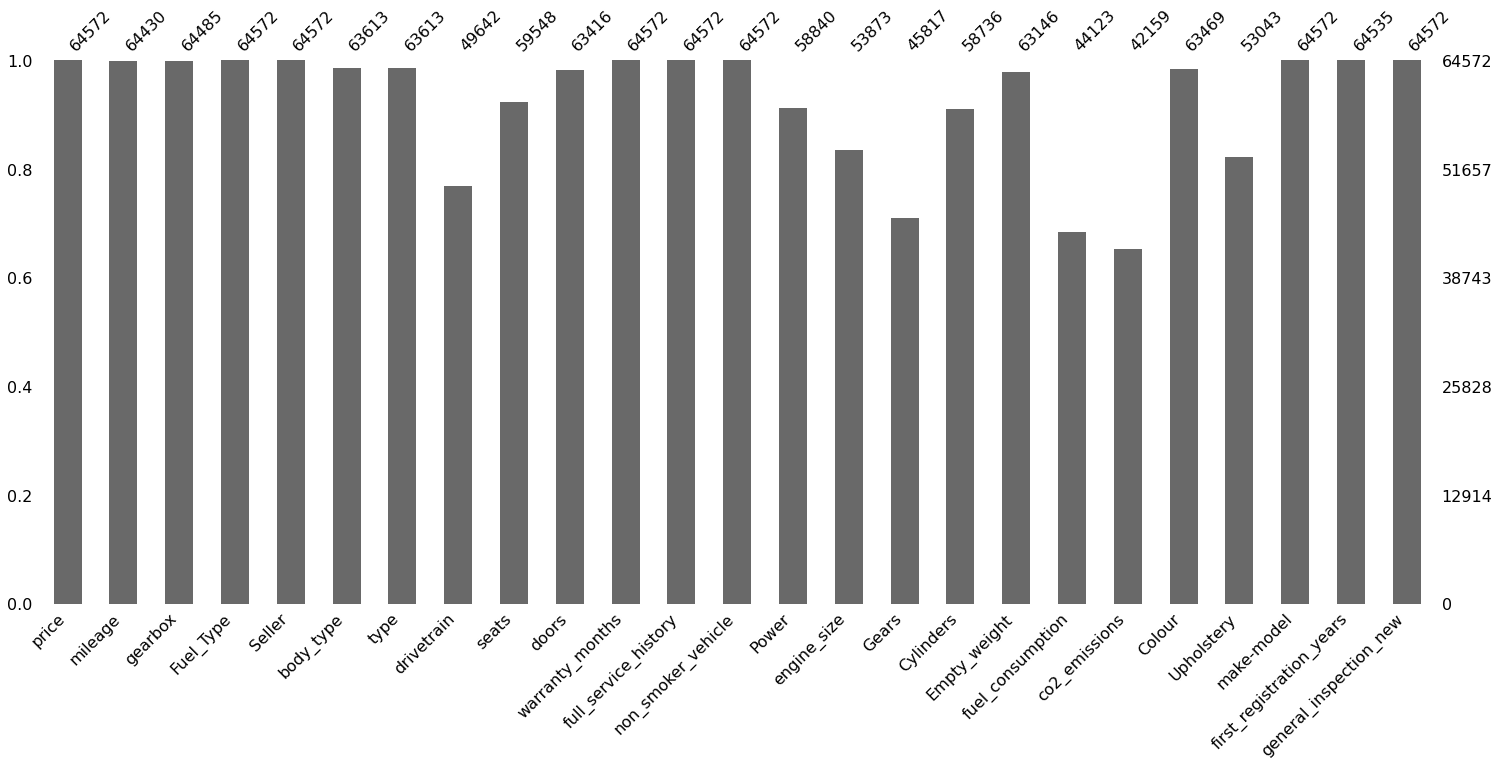

In [120]:
import missingno as msno
msno.bar(miss_df[['price', 'mileage', 'gearbox', 'Fuel_Type', 'Seller', 'body_type',
       'type', 'drivetrain', 'seats', 'doors', 'warranty_months',
       'full_service_history', 'non_smoker_vehicle', 'Power',
       'engine_size', 'Gears', 'Cylinders', 'Empty_weight',
       'fuel_consumption', 'co2_emissions', 'Colour', 'Upholstery','make-model', 'first_registration_years', 'general_inspection_new']]);

In [121]:
miss_df[['price', 'mileage', 'gearbox', 'Fuel_Type', 'Seller', 'body_type',
       'type', 'drivetrain', 'seats', 'doors', 'warranty_months',
       'full_service_history', 'non_smoker_vehicle', 'Power',
       'engine_size', 'Gears', 'Cylinders', 'Empty_weight',
       'fuel_consumption', 'co2_emissions', 'Colour', 'Upholstery','make-model', 'first_registration_years', 'general_inspection_new']].isnull().sum()

price                           0
mileage                       142
gearbox                        87
Fuel_Type                       0
Seller                          0
body_type                     959
type                          959
drivetrain                  14930
seats                        5024
doors                        1156
warranty_months                 0
full_service_history            0
non_smoker_vehicle              0
Power                        5732
engine_size                 10699
Gears                       18755
Cylinders                    5836
Empty_weight                 1426
fuel_consumption            20449
co2_emissions               22413
Colour                       1103
Upholstery                  11529
make-model                      0
first_registration_years       37
general_inspection_new          0
dtype: int64

In [122]:
def fill_most(df, group_col, col_name):
    for group in list(df[group_col].unique()):
        cond = df[group_col]==group
        grp_inx = list(df[cond][col_name].index)
        mode = list(df[cond][col_name].mode())
        if mode != []:
            df[col_name].iloc[grp_inx] = df[col_name].iloc[grp_inx].fillna(df[cond][col_name].mode()[0])
        else:
            df[col_name].iloc[grp_inx] = df[col_name].iloc[grp_inx].fillna(df[col_name].mode()[0])
def fill(df, group_col1, group_col2, col_name, method): # method can be "mode" or "median" or "ffill/bfill"
    if method == "mode":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                grp_inx = list(df[cond2][col_name].index)
                mode1 = list(df[cond1][col_name].mode())
                mode2 = list(df[cond2][col_name].mode())
                if (mode1 != []) and (mode2 != []):
                    df[col_name].iloc[grp_inx] = df[col_name].iloc[grp_inx].fillna(df[cond2][col_name].mode()[0]).fillna(df[cond1][col_name].mode()[0])
                elif mode1 != []:
                    df[col_name].iloc[grp_inx] = df[col_name].iloc[grp_inx].fillna(df[cond1][col_name].mode()[0])
                else:
                    df[col_name].iloc[grp_inx] = df[col_name].iloc[grp_inx].fillna(df[col_name].mode()[0])  


In [123]:
fill_most(miss_df,'make-model','body_type')
fill_most(miss_df,'make-model','drivetrain')
fill_most(miss_df,'make-model','type')
fill_most(miss_df,'make-model','Colour')
fill_most(miss_df,'make-model','Upholstery')
fill(miss_df,'make-model','body_type', 'gearbox', 'mode')

boolean = True
count = 0
while boolean:
  count += 1
  total_miss_numbers = miss_df[['gearbox','seats','Power','doors','warranty_months','engine_size','Gears','Cylinders','Empty_weight','fuel_consumption','co2_emissions','general_inspection_new']].isnull().sum().sum()
  if total_miss_numbers == 0:
    boolean = False
  if count == 10:
    boolean = False
  else:
    miss_df['doors'] = miss_df['doors'].fillna(miss_df.groupby(['make-model'])['doors'].transform('median'))
    miss_df['seats'] = miss_df['seats'].fillna(miss_df.groupby(['make-model'])['seats'].transform('median'))
    miss_df['Power'] = miss_df['Power'].fillna(miss_df.groupby(['es_qcut','ew_qcut'])['Power'].transform('median'))
    miss_df['Power'] = miss_df['Power'].fillna(miss_df.groupby(['fc_qcut','ew_qcut'])['Power'].transform('median'))
    miss_df['Power'] = miss_df['Power'].fillna(miss_df.groupby(['fc_qcut','es_qcut'])['Power'].transform('median'))
    miss_df['Power'] = miss_df['Power'].fillna(miss_df.groupby(['ew_qcut'])['Power'].transform('median'))
    miss_df['Power'] = miss_df['Power'].fillna(miss_df.groupby(['es_qcut'])['Power'].transform('median'))
    miss_df['Power'] = miss_df['Power'].fillna(miss_df.groupby(['make-model'])['Power'].transform('median'))
    miss_df['engine_size'] = miss_df['engine_size'].fillna(miss_df.groupby(['Cylinders'])['engine_size'].transform('median'))
    miss_df['Gears'] = miss_df['Gears'].fillna(miss_df.groupby(['make-model'])['Gears'].transform('median'))
    miss_df['Cylinders'] = miss_df['Cylinders'].fillna(miss_df.groupby(['make-model'])['Cylinders'].transform('median'))
    miss_df['Cylinders'] = miss_df['Cylinders'].fillna(miss_df.groupby(['es_qcut'])['Cylinders'].transform('median'))
    miss_df['Cylinders'] = miss_df['Cylinders'].fillna(miss_df.groupby(['Gears'])['Cylinders'].transform('median'))
    miss_df['Empty_weight'] = miss_df['Empty_weight'].fillna(miss_df.groupby(['make-model'])['Empty_weight'].transform('median'))
    miss_df['fuel_consumption'] = miss_df['fuel_consumption'].fillna(miss_df.groupby(['es_qcut'])['fuel_consumption'].transform('median'))
    miss_df['fuel_consumption'] = miss_df['fuel_consumption'].fillna(miss_df.groupby(['co_qcut'])['fuel_consumption'].transform('median'))
    miss_df['fuel_consumption'] = miss_df['fuel_consumption'].fillna(miss_df.groupby(['Cylinders'])['fuel_consumption'].transform('median'))
    miss_df['fuel_consumption'] = miss_df['fuel_consumption'].fillna(miss_df.groupby(['ew_qcut'])['fuel_consumption'].transform('median'))
    miss_df['co2_emissions'] = miss_df['co2_emissions'].fillna(miss_df.groupby(['fc_qcut'])['co2_emissions'].transform('median'))
    miss_df['co2_emissions'] = miss_df['co2_emissions'].fillna(miss_df.groupby(['Cylinders'])['co2_emissions'].transform('median'))
    miss_df['co2_emissions'] = miss_df['co2_emissions'].fillna(miss_df.groupby(['make-model'])['co2_emissions'].transform('median'))
    miss_df['co2_emissions'] = miss_df['co2_emissions'].fillna(miss_df.groupby(['p_qcut'])['co2_emissions'].transform('median'))
    miss_df['first_registration_years'] = miss_df['first_registration_years'].fillna(miss_df.groupby(['mileage'])['first_registration_years'].transform('median'))
    miss_df['first_registration_years'] = miss_df['first_registration_years'].fillna(miss_df.groupby(['co_qcut','m_qcut'])['first_registration_years'].transform('median'))
    miss_df['first_registration_years'] = miss_df['first_registration_years'].fillna(miss_df.groupby(['Fuel_Type'])['first_registration_years'].transform('median'))    
    miss_df['mileage'] = miss_df['mileage'].fillna(miss_df.groupby(['fry_qcut','general_inspection_new'])['mileage'].transform('mean'))
    miss_df['mileage'] = miss_df['mileage'].fillna(miss_df.groupby(['fry_qcut'])['mileage'].transform('mean'))
    miss_df['mileage'] = miss_df['mileage'].fillna(miss_df.groupby(['general_inspection_new'])['mileage'].transform('mean'))


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [124]:
miss_df[['price', 'mileage', 'gearbox', 'Fuel_Type', 'Seller', 'body_type',
       'type', 'drivetrain', 'seats', 'doors', 'warranty_months',
       'full_service_history', 'non_smoker_vehicle', 'Power',
       'engine_size', 'Gears', 'Cylinders', 'Empty_weight',
       'fuel_consumption', 'co2_emissions', 'Colour', 'Upholstery','make-model', 'first_registration_years', 'general_inspection_new']].corr()

,price,mileage,seats,doors,warranty_months,Power,engine_size,Gears,Cylinders,Empty_weight,fuel_consumption,co2_emissions,first_registration_years,general_inspection_new
price,1.000000,0.000471,-0.012429,-0.006086,0.006113,0.032759,0.003959,-0.000449,-0.007495,0.022647,0.002286,-0.008660,-0.000301,-0.002116
mileage,0.000471,1.000000,-0.009179,-0.042136,-0.014377,0.029920,0.050523,-0.006130,0.010595,0.051341,-0.000689,-0.007121,0.499753,0.338595
seats,-0.012429,-0.009179,1.000000,0.437403,0.037407,0.051236,-0.084401,0.043415,-0.057561,0.075547,-0.051690,-0.086438,-0.034768,-0.004260
doors,-0.006086,-0.042136,0.437403,1.000000,0.091128,-0.036579,-0.179619,-0.021179,-0.179402,0.105667,-0.190451,-0.217518,-0.073779,-0.019816
warranty_months,0.006113,-0.014377,0.037407,0.091128,1.000000,0.049545,-0.081251,0.001879,-0.101828,0.043969,-0.084694,-0.123980,-0.014622,-0.003382
Power,0.032759,0.029920,0.051236,-0.036579,0.049545,1.000000,0.480538,0.061560,0.208939,0.744050,0.371464,0.098095,-0.003297,0.005414
engine_size,0.003959,0.050523,-0.084401,-0.179619,-0.081251,0.480538,1.000000,0.304194,0.696072,0.391735,0.584038,0.565082,0.056947,0.016684
Gears,-0.000449,-0.006130,0.043415,-0.021179,0.001879,0.061560,0.304194,1.000000,0.566268,0.025463,0.127039,0.379786,0.016172,-0.006323
Cylinders,-0.007495,0.010595,-0.057561,-0.179402,-0.101828,0.208939,0.696072,0.566268,1.000000,0.084830,0.546301,0.747542,0.042247,0.001399
Empty_weight,0.022647,0.051341,0.075547,0.105667,0.043969,0.744050,0.391735,0.025463,0.084830,1.000000,0.325622,0.027167,0.011294,0.010619


In [125]:
miss_df[['price', 'mileage', 'gearbox', 'Fuel_Type', 'Seller', 'body_type',
       'type', 'drivetrain', 'seats', 'doors', 'warranty_months',
       'full_service_history', 'non_smoker_vehicle', 'Power',
       'engine_size', 'Gears', 'Cylinders', 'Empty_weight',
       'fuel_consumption', 'co2_emissions', 'Colour', 'Upholstery','make-model', 'first_registration_years', 'general_inspection_new']].isnull().sum()

price                       0
mileage                     0
gearbox                     0
Fuel_Type                   0
Seller                      0
body_type                   0
type                        0
drivetrain                  0
seats                       0
doors                       0
warranty_months             0
full_service_history        0
non_smoker_vehicle          0
Power                       0
engine_size                 0
Gears                       0
Cylinders                   0
Empty_weight                0
fuel_consumption            0
co2_emissions               0
Colour                      0
Upholstery                  0
make-model                  0
first_registration_years    0
general_inspection_new      0
dtype: int64

In [126]:
Fuel_Type = pd.get_dummies(miss_df["Fuel_Type"], drop_first=True).add_prefix("Fuel_Type_")
Colour = pd.get_dummies(miss_df["Colour"], drop_first=True).add_prefix("Colour_")
Upholstery = pd.get_dummies(miss_df["Upholstery"], drop_first=True).add_prefix("Upholstery_")
Seller = pd.get_dummies(miss_df["Seller"], drop_first=True).add_prefix("Seller_")
gearbox = pd.get_dummies(miss_df["gearbox"], drop_first=True).add_prefix("gearbox_")
body_type = pd.get_dummies(miss_df["body_type"], drop_first=True).add_prefix("body_type_")
Type = pd.get_dummies(miss_df["type"], drop_first=True).add_prefix("type_")
drivetrain = pd.get_dummies(miss_df["drivetrain"], drop_first=True).add_prefix("drivetrain_")
full_service_history = pd.get_dummies(miss_df["full_service_history"], drop_first=True).add_prefix("full_service_history_")
non_smoker_vehicle = pd.get_dummies(miss_df["non_smoker_vehicle"], drop_first=True).add_prefix("non_smoker_vehicle_")
make_model = pd.get_dummies(miss_df["make-model"], drop_first=True).add_prefix("make-model_")

In [127]:
total = pd.concat([Fuel_Type,Colour,Upholstery,Seller,gearbox,body_type,Type,drivetrain,full_service_history,non_smoker_vehicle,make_model],axis=1)
total.shape

(64572, 395)

In [128]:
miss_df = pd.concat([miss_df,total],axis=1)

In [129]:
miss_df.drop(columns = ["Fuel_Type","Colour","Upholstery","Seller","gearbox","body_type","type","drivetrain","full_service_history","non_smoker_vehicle","make-model"], inplace = True)

In [130]:
miss_df.drop(columns = ['price', 'mileage','seats', 'doors', 'warranty_months', 'Power',
       'engine_size', 'Gears', 'Cylinders', 'Empty_weight',
       'fuel_consumption', 'co2_emissions', 'first_registration_years', 'general_inspection_new'])

,Fold flat passenger seat,Parking assist system sensors rear,Heated steering wheel,Air suspension,Parking assist system camera,360° camera,Sliding door right,Electrically adjustable seats,Auxiliary heating,Air conditioning,...,make-model_Volvo-V40 Cross Country,make-model_Volvo-V50,make-model_Volvo-V60,make-model_Volvo-V60 Cross Country,make-model_Volvo-V70,make-model_Volvo-V90,make-model_Volvo-XC40,make-model_Volvo-XC60,make-model_Volvo-XC70,make-model_Volvo-XC90
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64567,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
64568,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
64569,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
64570,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [131]:
corr_matrix = miss_df.corr().abs()
high_corr_var=np.where(corr_matrix>0.9)
high_corr_var=[(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]

In [132]:
for i in range(len(high_corr_var)):
  miss_df.drop(columns = [high_corr_var[i][0]], inplace = True)

# Data Featuring

In [133]:
miss_df["mileage/years"] = miss_df["mileage"]/miss_df["first_registration_years"]

In [134]:
miss_df["total_consumption"] = miss_df["fuel_consumption"]*miss_df["mileage"]/100

In [135]:
miss_df["total_co2_emissions"] = miss_df["mileage"] * miss_df["co2_emissions"]

# Functions_Outliers

In [136]:
def capping_outliers(s, whisker=1.5):
  # replace outliers with upper_bound and lower_bound values
  indexes = s.dropna().index
  col = s.dropna()
  iqr = (np.quantile(col, 0.95))-(np.quantile(col, 0.05))
  upper_bound = np.quantile(col, 0.95)+(whisker*iqr)
  lower_bound = np.quantile(col, 0.05)-(whisker*iqr)
  upper_bound = upper_bound if upper_bound < col.max() else col.max(),
  lower_bound = lower_bound if lower_bound > col.min() else col.min(),

  col = np.where(col > upper_bound, upper_bound,col)
  col = np.where(col < lower_bound, lower_bound,col)
  plt.figure(figsize=(8,3))
  sns.boxplot(x= col)
  plt.show()
  s[indexes]=col
  return s

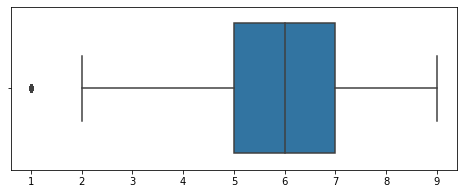

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


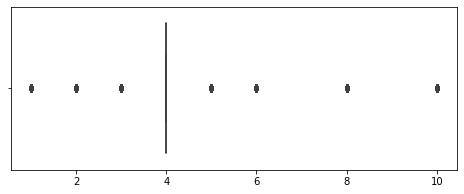

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


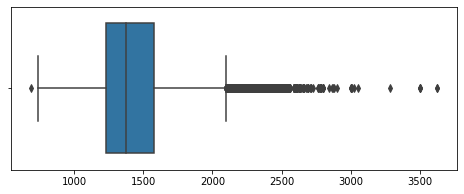

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


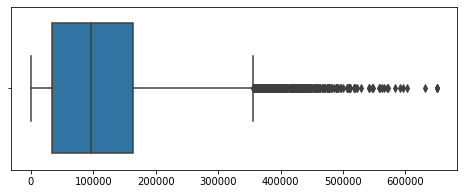

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


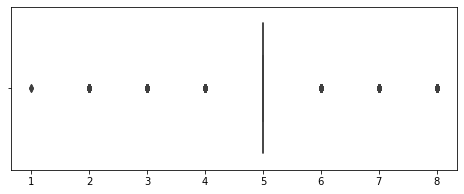

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


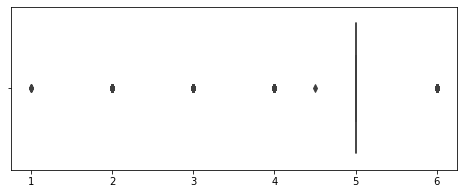

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


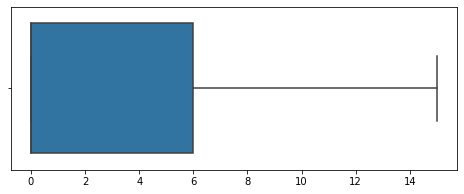

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


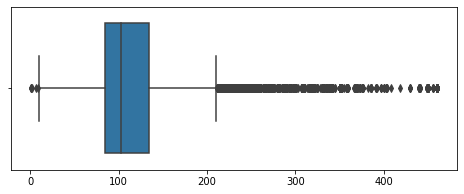

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


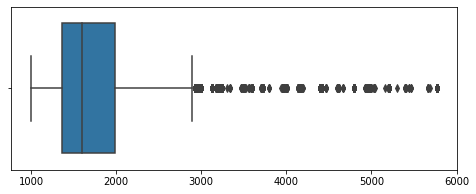

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


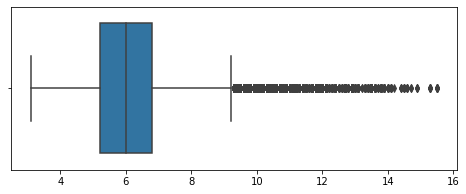

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


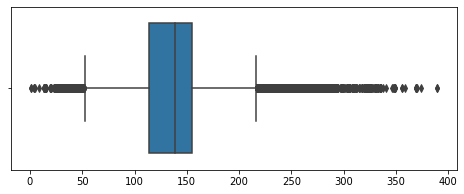

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


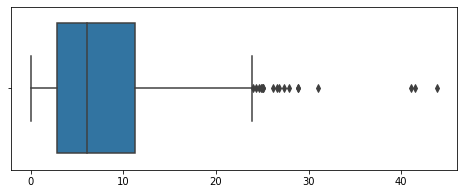

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


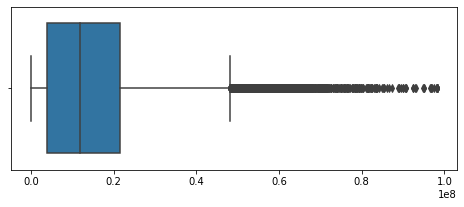

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


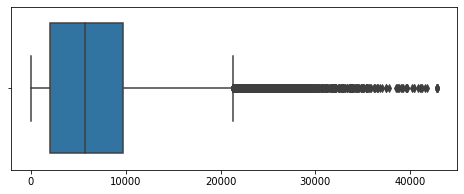

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


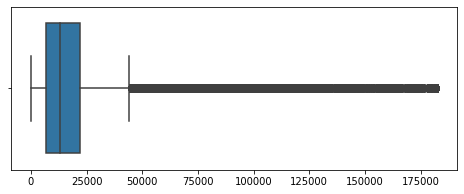

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [137]:
miss_df['Gears'] = capping_outliers(miss_df['Gears'])
miss_df['Cylinders'] = capping_outliers(miss_df['Cylinders'])
miss_df['Empty_weight'] = capping_outliers(miss_df['Empty_weight'])
miss_df['mileage'] = capping_outliers(miss_df['mileage'])
miss_df['seats'] = capping_outliers(miss_df['seats'])
miss_df['doors'] = capping_outliers(miss_df['doors'])
miss_df['warranty_months'] = capping_outliers(miss_df['warranty_months'])
miss_df['Power'] = capping_outliers(miss_df['Power'])
miss_df['engine_size'] = capping_outliers(miss_df['engine_size'])
miss_df['fuel_consumption'] = capping_outliers(miss_df['fuel_consumption'])
miss_df['co2_emissions'] = capping_outliers(miss_df['co2_emissions'])
miss_df['first_registration_years'] = capping_outliers(miss_df['first_registration_years'])
miss_df["total_co2_emissions"] = capping_outliers(miss_df["total_co2_emissions"])
miss_df["total_consumption"] = capping_outliers(miss_df["total_consumption"])
miss_df["mileage/years"] = capping_outliers(miss_df["mileage/years"])

In [138]:
from sklearn.neighbors import LocalOutlierFactor

In [139]:
clf = LocalOutlierFactor(n_neighbors = 8, contamination = 0.1)
clf.fit_predict(miss_df[['price', 'mileage','seats', 'doors', 'warranty_months', 'Power',
       'engine_size', 'Gears', 'Cylinders', 'Empty_weight',
       'fuel_consumption', 'co2_emissions', 'first_registration_years', 'general_inspection_new',"total_co2_emissions","total_consumption","mileage/years"]])
X_noncategorical_scores=clf.negative_outlier_factor_

In [140]:
threshold_value = np.sort(X_noncategorical_scores)[18]
miss_df.drop(miss_df[X_noncategorical_scores<threshold_value].index, axis = 0, inplace = True)

# Visulation

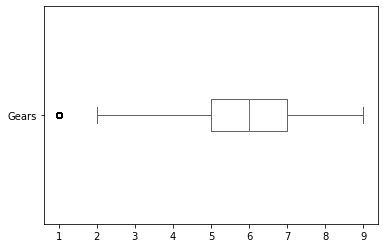

In [141]:
miss_df.Gears.plot.box(vert=False);

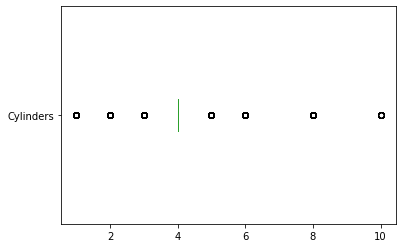

In [142]:
miss_df.Cylinders.plot.box(vert=False);

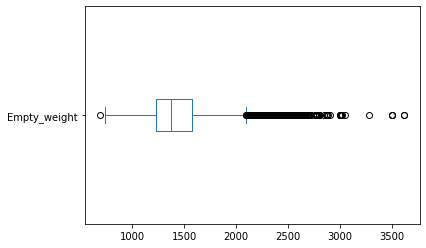

In [143]:
miss_df.Empty_weight.plot.box(vert=False);

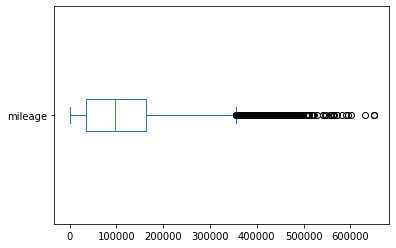

In [144]:
miss_df.mileage.plot.box(vert=False);

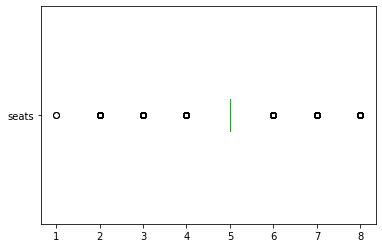

In [145]:
miss_df.seats.plot.box(vert=False);

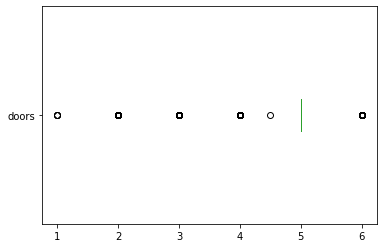

In [146]:
miss_df.doors.plot.box(vert=False);

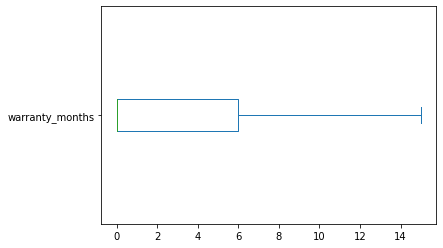

In [147]:
miss_df.warranty_months.plot.box(vert=False);

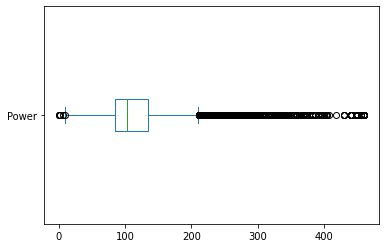

In [148]:
miss_df.Power.plot.box(vert=False);

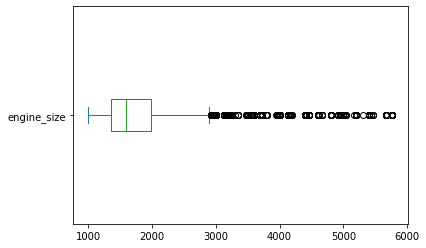

In [149]:
miss_df.engine_size.plot.box(vert=False);

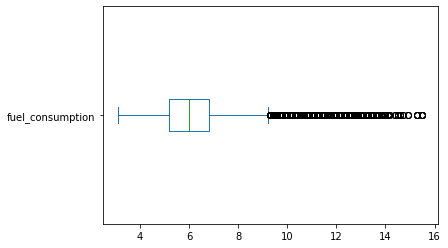

In [150]:
miss_df.fuel_consumption.plot.box(vert=False);

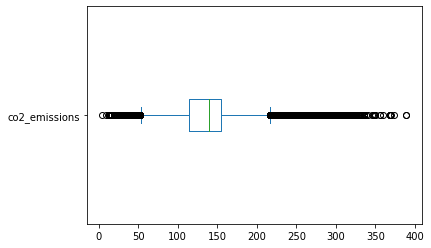

In [151]:
miss_df.co2_emissions.plot.box(vert=False);

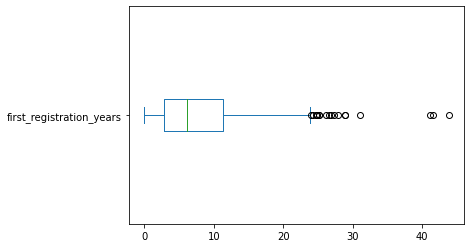

In [152]:
miss_df.first_registration_years.plot.box(vert=False);

In [153]:
miss_df.to_csv('car_data.csv')